<a href="https://colab.research.google.com/github/jg4726/public-file/blob/main/Copy_of_mle_exponential_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/pantelis/aiml-common/blob/master/assignments/mle/mle_exponential_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Parameter Estimation

RUBRIC:

1. If you provide just the plots/code, you will be granted 50% of the points. To win the remaining 50% you will need clear documentation.

2. We need to see a clear explanation of all the stages of developing the solutions which means that you need to explain the code in a way that the writeup is understood by fellow students.

3. Type inline with your Colab notebook your tutorial explanations. Equations can be typed in markdown using Latex syntax notation. If you prefer plain Python you can also include markdown as a separate file but you do need to ensure that all plots are inline to that markdown document and are parsed correctly by Github.

4. Submit in the learning management system of your school (Canvas, Brightspace etc.) by first sharing the Colab or Github repo with the TA so that they can open it without any access restrictions. Any notebook that cant be accessed will receive the grade of 0. 

## Intro:

**What is the exponential distribution?**

The exponential distribution is a probability distribution that describes time between events in a Poisson process. There is a strong relationship between the Poisson distribution and the Exponential distribution. For example, let’s say a Poisson distribution models the number of births in a given time period. The time in between each birth can be modeled with an exponential distribution (Young & Young, 1998).

**Poisson vs Exponential?**

Let’s say a Youtube channel is interested in the number of views per hour. Arrivals per hour has a Poisson 120 arrival rate, which means that 120 viewers arrive per hour. This could also be said that “The expected mean inter-arrival time is 0.5 minutes”, because a viewer can be expected every 1/2 minute (30 seconds).

The exponential distribution models this process, so we could write:
Poisson 120 = Exponential 0.5

The units for the Poisson process are viewers and the units for the exponential are minutes.


**Videos that may help:**
1.  https://www.youtube.com/watch?v=p3T-_LMrvBc&ab_channel=StatQuestwithJoshStarmer
2. https://www.youtube.com/watch?v=2kg1O0j1J9c&ab_channel=zedstatistics




## Part 1 (30 points):

**A)** Let X = amount of time (in minutes) a ice cream man gets a new customer at his cart. The time is known to have an exponential distribution with the average amount of time between a new customer being four minutes. 

Plot the probablity density function of the exponential distribution of this ice cream man getting a customer every 4 minutes. (10 points)

You may use the Python libraries to calculate the exponential distribution and to plot. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

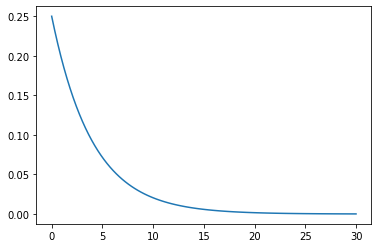

In [ ]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt
x=np.linspace(0,30,100)
plt.plot(x,expon.pdf(x,0,4))

# This plot shows the generated exponential distribution with lambda =4 that 
# most of the customer come in every 4 minutes. The 


**B)** Now assume on a very hot day the ice cream man gets X customers and each new customer comes every 4 minutes. Generate X samples from the exponential distribution where X = 200 and the rate = 4. Plot the samples on a graph to show how they look graphically. Does it look similar to the graph above? (20 points)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'),
 (0.0, 38.93198488775285),
 Text(0.5, 0, 'Exponential Distribution')]

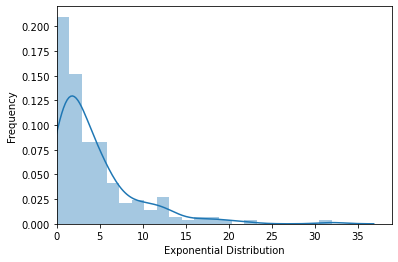

In [ ]:
import seaborn as sns
from scipy.stats import expon
random_expon = expon.rvs(scale=4,loc=0,size=200)
ax = sns.distplot(random_expon)

ax.set(xlabel='Exponential Distribution', ylabel='Frequency',xlim = 0)
#Yes they look relatively the same

## Part 2 (30 points)

Assume that you are given the customer data generated in Part 1, implement a Gradient Descent algorithm from scratch that will estimate the Exponential distribution according to the Maximum Likelihood criterion.

Answer the following:

1. Plot the negative log likelihood of the exponential distribution. (10 points)
2. What is the lambda MLE of the generated data? (10 points)
3. Plot the estimated lambda vs iterations to showcase convergence towards the true lambda (10 points)


Read this article to obtain the likelihood and negative log likelihood function of the exponential distribution: https://www.statlect.com/fundamentals-of-statistics/exponential-distribution-maximum-likelihood


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
No handles with labels found to put in legend.


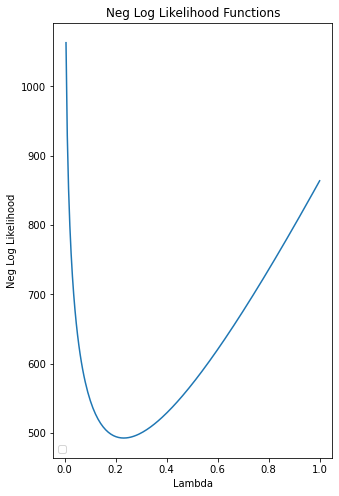

In [ ]:
#1
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Neg Log Likelihood Functions")
    plt.xlabel("Lambda")
    plt.ylabel("Neg Log Likelihood")
    mu_set = np.linspace(0, 1, 200)
    
    ll_array = []
    for j in mu_set:
            temp_mm = 0
            temp_mm= sum(random_expon)  # Sum all the data for generated random expon
            ll_array.append(-(200 *np.log(j)-j*temp_mm)) # negative Log likelihood is -N*loglambda +lambda * sum(x1...xn)
        # Plot the results
    plt.plot(mu_set, ll_array)
 
    plt.legend(loc='lower left')
plot_ll(random_expon)

#As you can see the plot that the negative log likelhood is around 0.25 which is the lowest point of the curve

In [ ]:
#2
200/sum(random_expon)
#this is given by 0= derivative of log likelihood function and set it equal to 0
#then max lambda = N/sum(x1...xn)

0.23154412995951776

In [ ]:
#3

Final w: 0.23154412995951779


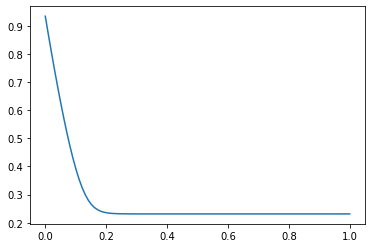

In [ ]:
x=np.linspace(0,1,100)
target = expon.pdf(random_expon,0,4)
w= 1 #intialize the w which updated later


def grad(Y,w):  #define the derivative of log likelihood which is N/lambda - sum(x1..xn)
  g= (200/w)-sum(Y)
  return g

learning_rate = 0.0001  #set learning rate to 0.0001 which means really slow
new_w= []

for i in range(100):

    w -= learning_rate * (-grad(random_expon,w)) # update the lamdba that we want to find

    new_w.append(w)


print ("Final w:", w)
plt.plot(x,new_w)
# the plot shows that around 0.23 it's almost flatten out which means we found the smallest lambda

## Part 3: (40 points)

Suppose we have a training set of $m$ independently distributed samples 

$\{ (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_3,y_3), (x_m,y_m)\}$

that is generated from a distribution $p_{data}(x,y)$

Assumming a Gaussian model

$p_{model}(y_i | x_i; \mathbf w) = \frac{1}{ \sqrt{2πσ^2}} exp(-\frac{(y_i - \mathbf w^T \mathbf x_i)^2}{2σ^2}) $

Write the expression of the Negative Log Likelihood function $NLL$. (10 points)

Write the parameters $\mathbf w$ and the $\sigma^2$ that minimize the NLL (10 points)

Write a Python script that uses SGD to converge to $\mathbf w_{ML}$ and $\sigma_{ML}^2$ for the following dataset (20 points)

HINT: You may need to estimate the conditional mean first and then the variance of the Gaussian $p_{model}$ 


In [ ]:
import numpy as np

x = np.array([8, 16, 22, 33, 50, 51])
y = np.array([5, 20, 14, 32, 42, 58])

Question 1:
The likelihood of gaussian is given by
\begin{align}
\mathcal{L} = p(\mathbf{Y}|\theta) &= \mathcal{N}(\mathbf{Y}|\theta)\\
              &= \mathcal{N}(\mathbf{Y}|{w^Tx_i}, \Sigma)\\
\end{align}
Then we find the log of 
\begin{align}
  \log(\mathcal{N}(\mathbf{Y}|\theta)) &= \sum\limits_{n=1}^{N} \log(\mathcal{N}(\mathbf{y}_{i}|\theta)) = \sum\limits_{n=1}^{N} \log(\mathcal{N}(\mathbf{y}_{i}|w^Tx_i, \Sigma) \\
\end{align}
From there we have
\begin{align}
  \sum\limits_{n=1}^{N} \log(\mathcal{N}(\mathbf{y}_{i}|{w^Tx_i}, \sigma^{2})) &= \sum\limits_{n=1}^{N} \log \Big( \frac{1}{\sqrt{2\pi\sigma^{2}}} \cdot \exp^{-\frac{1}{2} \big(\frac{(y_{i} - {w^Tx_i})^{2}}{\sigma^{2}}\big)}  \Big) \\
\end{align}
Since 
\begin{align}
  \sum\limits_{n=1}^{N} \log(\mathcal{N}(\mathbf{y}_{i}|{w^Tx_i}, \sigma^{2})) &=
  \mathcal{LL}
\end{align}
Then we have Negative log likelihood function:
\begin{align}
  \mathcal{NLL}&= - \sum\limits_{n=1}^{N} \Big( \log \Big( \frac{1}{\sqrt{2\pi\sigma^{2}}} \Big) + \log \Big( \exp^{-\frac{1}{2} \big(\frac{(x_{n} - \mu)^{2}}{\sigma^{2}}\big)}  \Big) \Big) \\
\end{align}
Thus after the log transformation
\begin{align}
  \mathcal{negativeLL} &= \frac{1}{2} \log ( 2\pi\sigma^{2} )  +\frac{1}{2\sigma^{2}} \sum\limits_{n=1}^{N}  (y_{i} - {w^T}x_i)^{2} \\
\end{align}

Question 2:
The partial derivative of sigma square is:
\begin{align}
  \frac{\partial \mathcal{NLL}}{\partial \sigma^{2}} &= \frac{\partial}{\partial \sigma^{2}} \Big( \frac{N}{2} \log ( 2\pi\sigma^{2} )  + \frac{1}{2\sigma^{2}} \sum\limits_{i=1}^{N} (y_{i} - w^tx_i)^{2} \Big)\\
  &=  \frac{\partial}{\partial \sigma^{2}} \Big( \frac{N}{2} \log ( 2\pi\sigma^{2} )\Big)  + \frac{\partial}{\partial \sigma^{2}} \Big( \frac{1}{2\sigma^{2}} \sum\limits_{i=1}^{N} (y_{i} - w^Tx_i)^{2} \Big)\\
\end{align}

Then we set it equal to 0 to find the minimum value
\begin{align}
\frac{\partial \mathcal{NLL}}{\partial \sigma^2} =
\frac{N}{2\sigma^2} - \frac{1}{2\sigma^4} \sum\limits_{i=1}^{N} (y_{i} - {w^T}x_i)^{2} = 0\\
\end{align}

Finally we find the minimum sigma square function:
\begin{align}
\sigma^2=\frac{1}{2N} \sum\limits_{i=1}^{N}(y_i - w^Tx_i)
\end{align}

Question 2. The partial derivative for w^T s:
\begin{align}
  \frac{\partial \mathcal{NLL}}{\partial w^T} = \frac{\partial}{\partial w^T} \Big( \frac{N}{2} \log ( 2\pi\sigma^{2} )  + \frac{1}{2\sigma^{2}} \sum\limits_{i=1}^{N} (y_{i} - w^tx_i)^{2} \Big)\\
\end{align}
Then we find the derivative and set it equal to 0:
\begin{align}
  \frac{\partial \mathcal{NLL}}{\partial w^T} 
  &= \frac{1}{\sigma^2} \sum\limits_{i=1}^{N} ({-x_i}) (y_{i} - {w^T}x_i) = 0
  \\
\end{align}
Finally we have the function to find the minimum w^t:

\begin{align}
w^T= \frac{1}{Nx_i}\sum\limits_{i=1}^{N} y_{i} \\
\end{align}


In [ ]:
#question 3
import pandas as pd
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


x_data = scale.fit_transform(x[:,None])   #Standardize the x and y data
y_data = scale.fit_transform(y[:,None])

In [ ]:

w= 1
sigma = 1

def grad_sigma(x,Y,sigma,w):  #partial derivative of sigma square which is given above
  g=0
  for i in range(len(Y)):
    g+= ((Y[i]-w*x[i])**2)
  final = len(Y)/(2*(sigma))- g*(1/(2*sigma**2))
  return final

def grad_w(x,Y,sigma,w):   #partial derivative of w^T which is given above
  g=0
  for i in range(len(Y)):
    g+= (-1/(sigma))*(x[i])*(Y[i]-w*x[i])
  return g

learning_rate = 0.001
new_sigma= []
new_w=[]
for i in range(10000):
    # gradient descent weight udpate
    
    sigma -= learning_rate * (grad_sigma(x_data,y_data,sigma,w))
    w -= learning_rate * (grad_w(x_data,y_data,sigma,w))
    new_sigma.append(sigma)
    new_w.append(w)


print ("Final w:", w) #this will print the final value of W
print ("Final sigma:", sigma) #this will print the final value of sigma


Final w: [0.94939346]
Final sigma: [0.09865206]


In [ ]:

p=0
for i in range(6):
  p+=(y_data[i] - 0.94*x_data[i])**2
p/6


array([0.0987403])